## Answer 1

In [1]:
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.pyplot import figure
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import pandas as pd

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [2]:
 def normalize(x):
    '''
    Helper function
    '''
    return x/((x.max()-x.min())*1.0)

In [3]:
def solve(images):
    for img in images:
        # read the image
        fig = plt.figure(figsize=(13,13));
        img = mpimg.imread(img)
        plt.imshow(img);
        plt.title('Original image')
        
        # add channel 4
        x=np.matrix(np.arange(0,321,1))
        channel_4=np.repeat(x, 481, axis=0).T
        channel_4=np.expand_dims(channel_4, axis=2)
        feature=np.concatenate([img,channel_4],axis=-1)
        
        # add channel 5
        x=np.matrix(np.arange(0,481,1))
        channel_5=np.repeat(x, 321, axis=0)
        channel_5=np.expand_dims(channel_5, axis=2)
        feature=np.concatenate([feature,channel_5],axis=-1)
        
        # convert feature to float
        feature=feature*1.0
        
        # normalize each channel
        for channel in range(feature.shape[2]):
            feature[:,:,channel]=(normalize(feature[:,:,channel]))
            
        feature=feature.reshape((-1,5))
        print ("feature shape is ",feature.shape)
        
        for clusters in [2,3,4,5]:
            fig = plt.figure(figsize=(13,13));
            kmeans = KMeans(n_clusters=clusters, random_state=0).fit(feature) # apply kmeans
            bitmap=(kmeans.labels_.reshape(img.shape[0],img.shape[1])) 
            plt.title("K means segmentation with k="+str(clusters))
            plt.imshow(bitmap); # plot the segmentation 
            plt.show()
            
            
        for clusters in [2,3,4,5]:
            fig = plt.figure(figsize=(13,13));
            gmm = GaussianMixture(n_components=clusters).fit(feature) # apply GMM
            labels = gmm.predict(feature) 
            bitmap=(labels.reshape(img.shape[0],img.shape[1]))
            plt.title("GMM segmentation with "+str(clusters)+" mixture models")
            plt.imshow(bitmap);
            plt.show()

feature shape is  (154401, 5)


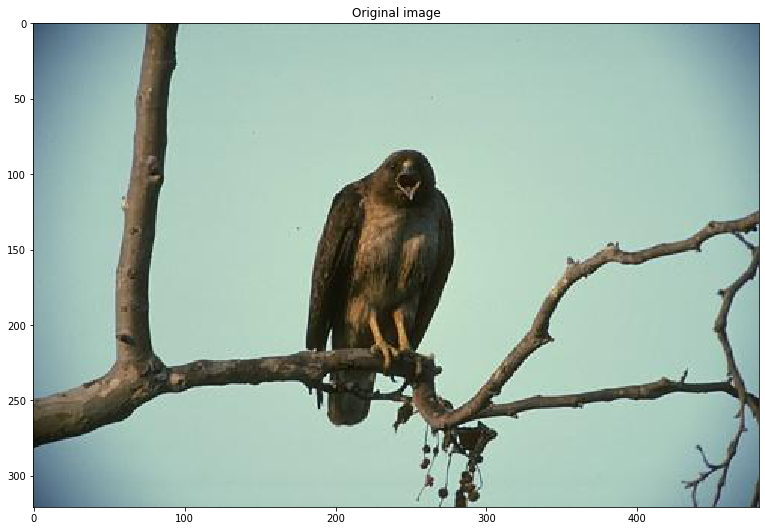

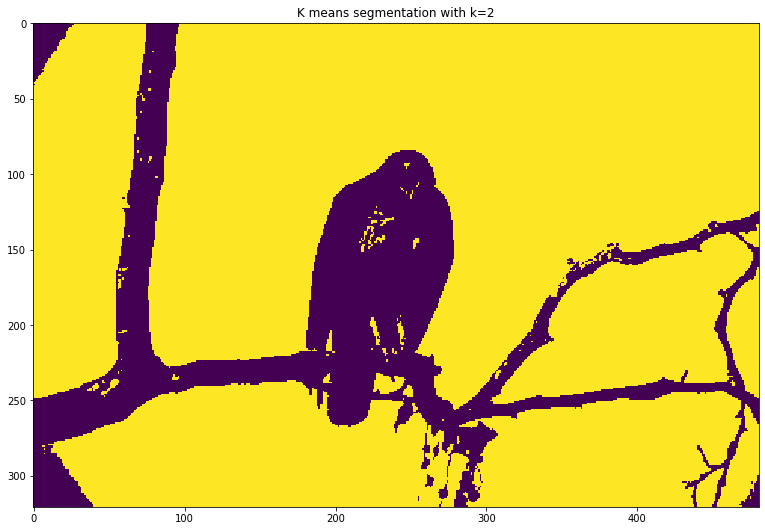

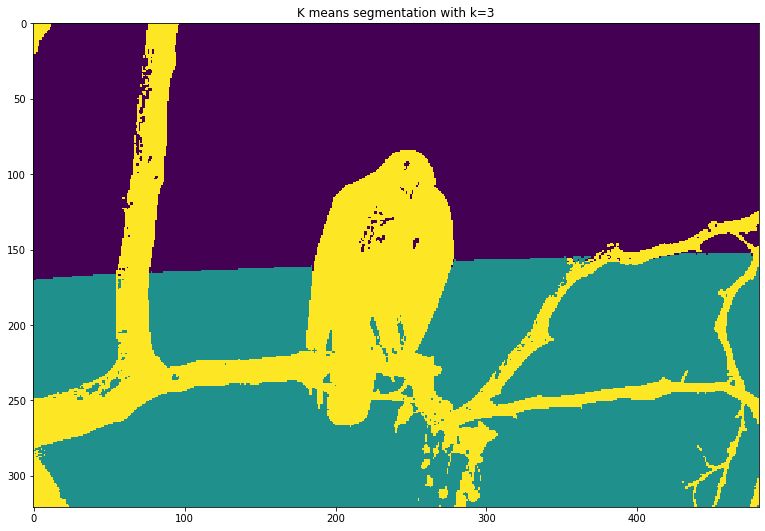

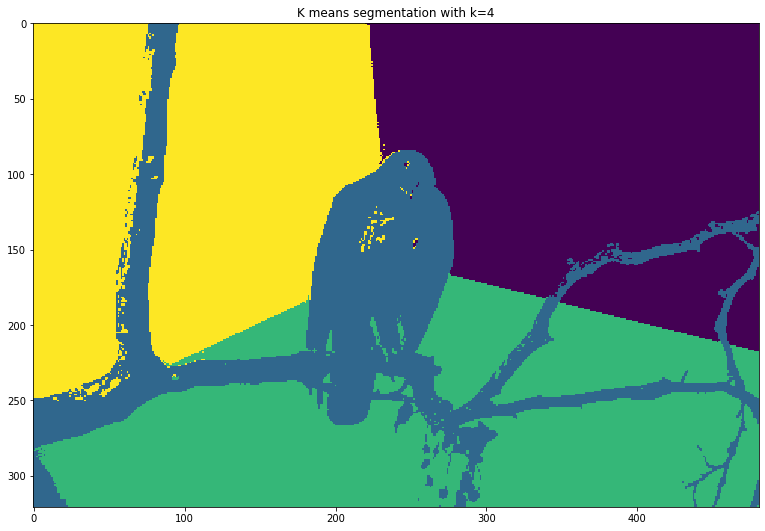

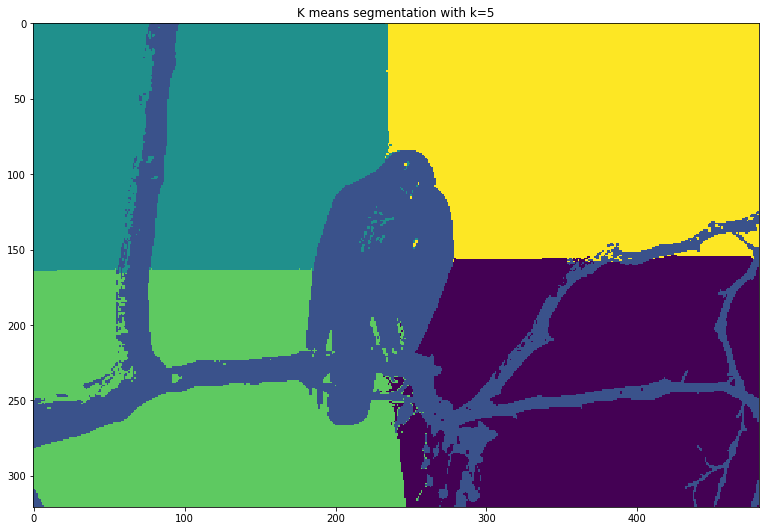

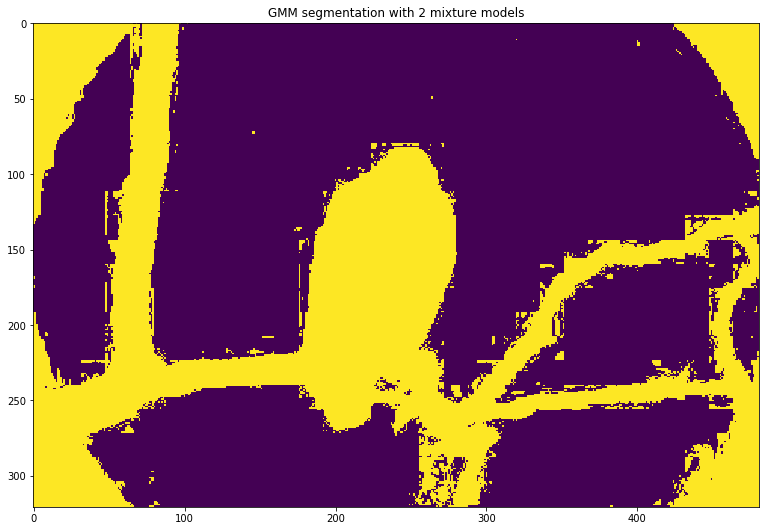

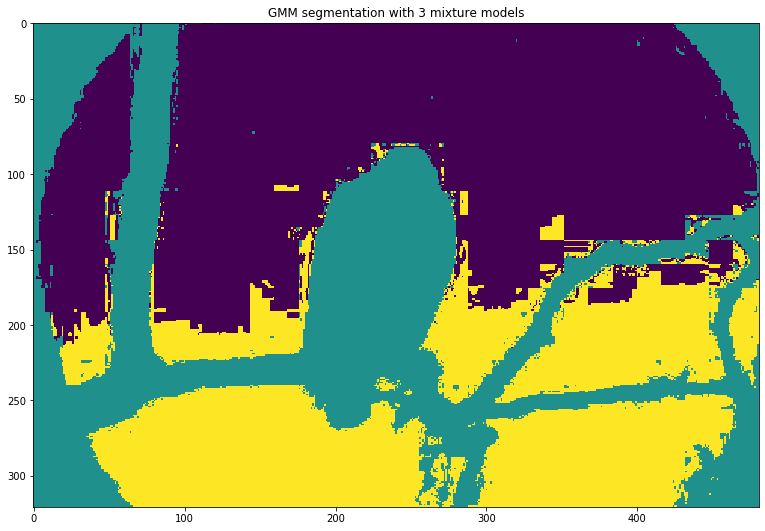

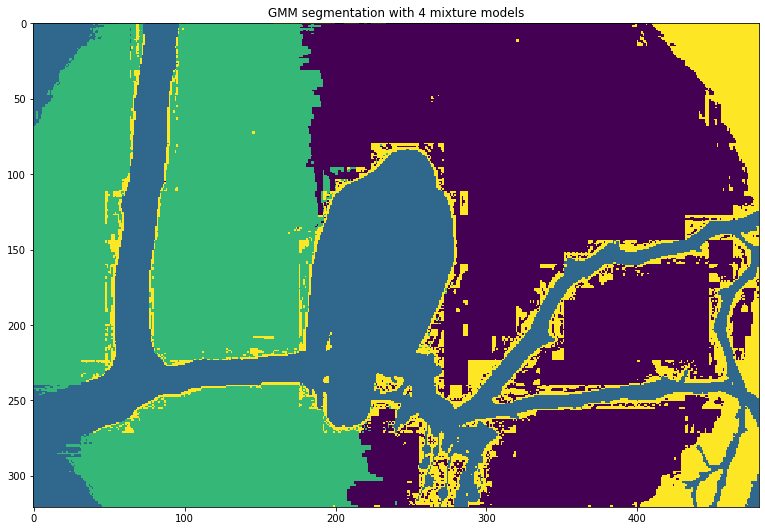

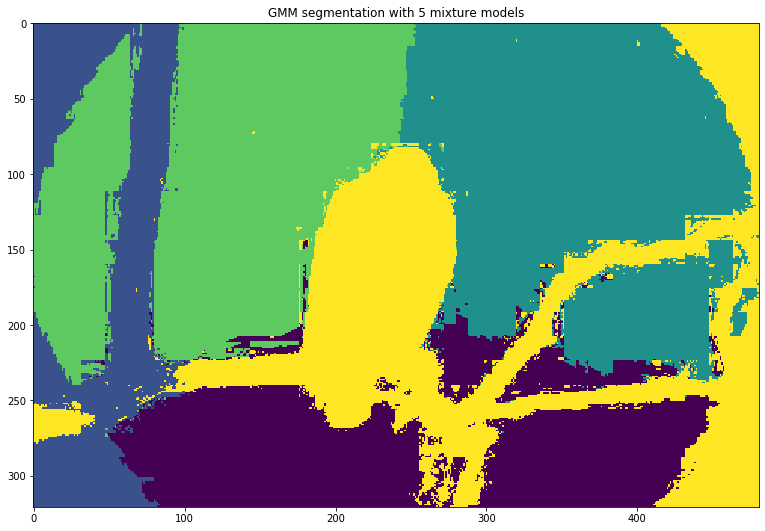

feature shape is  (154401, 5)


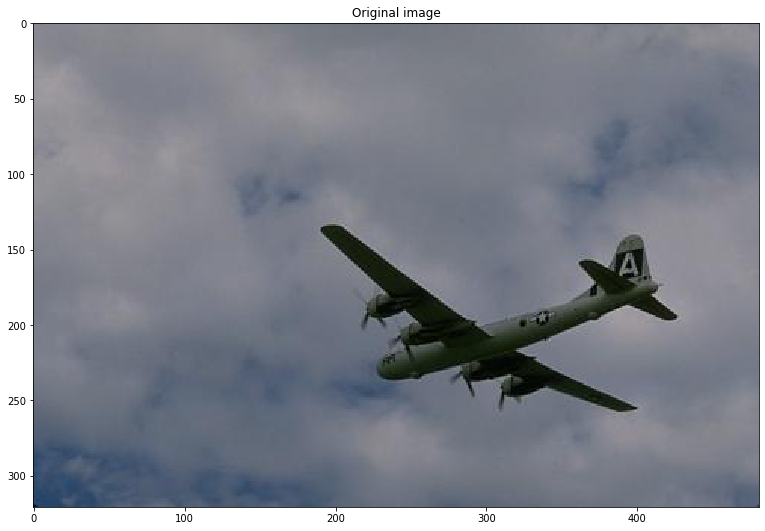

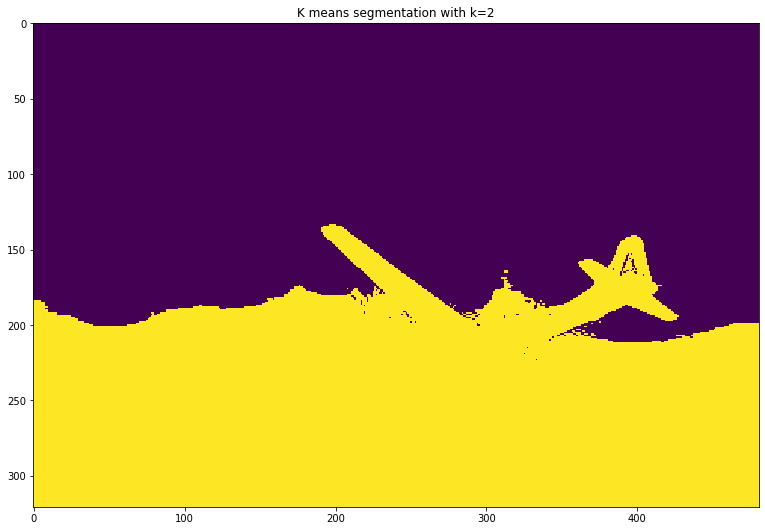

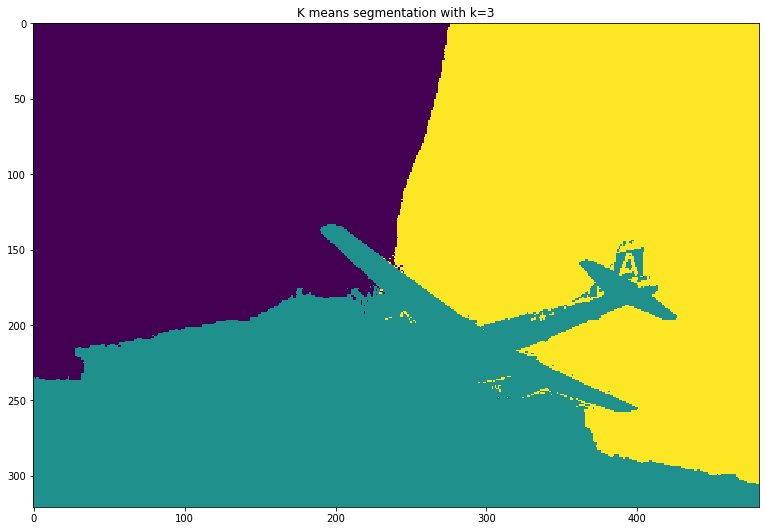

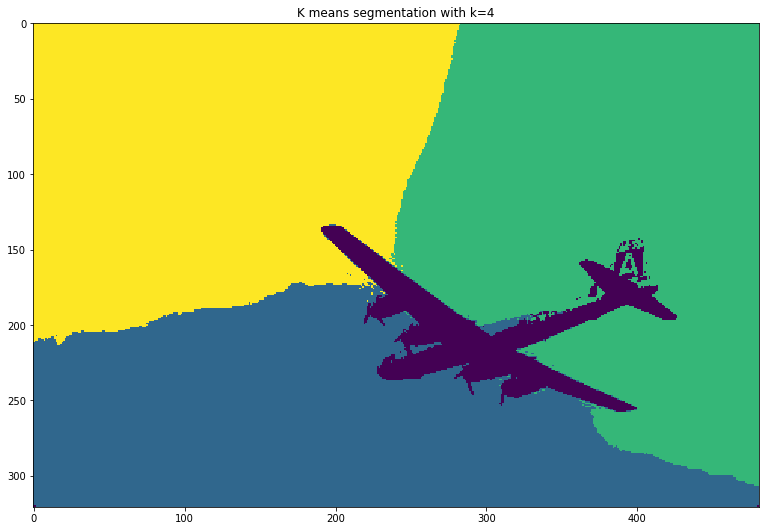

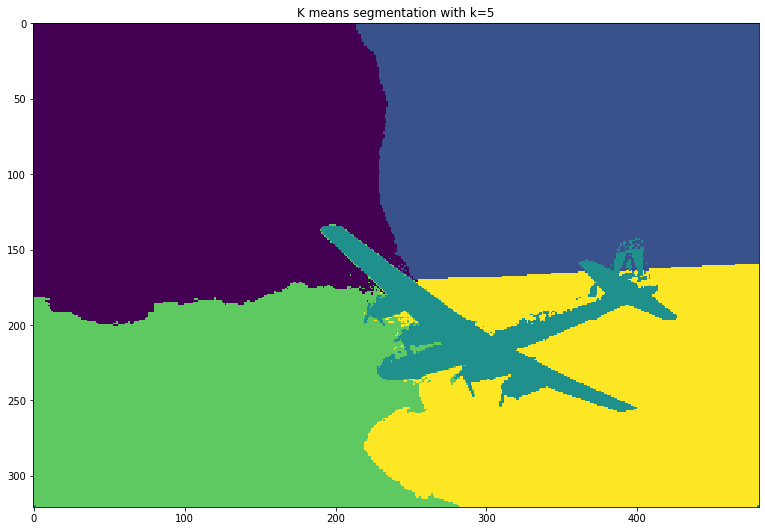

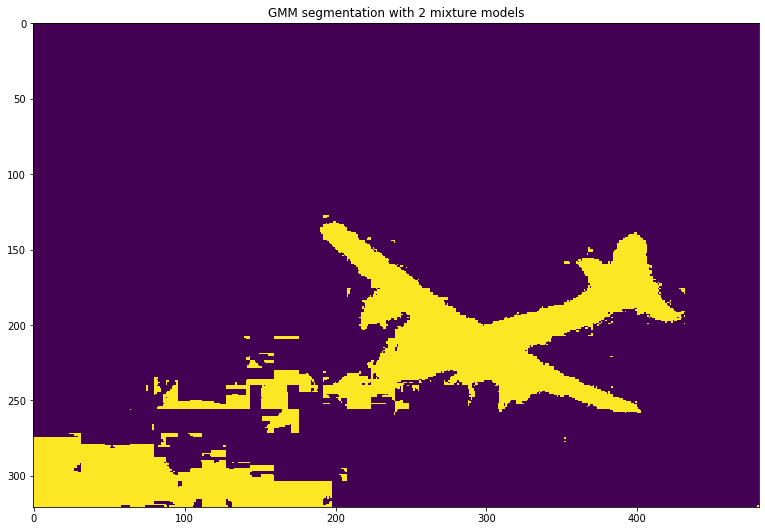

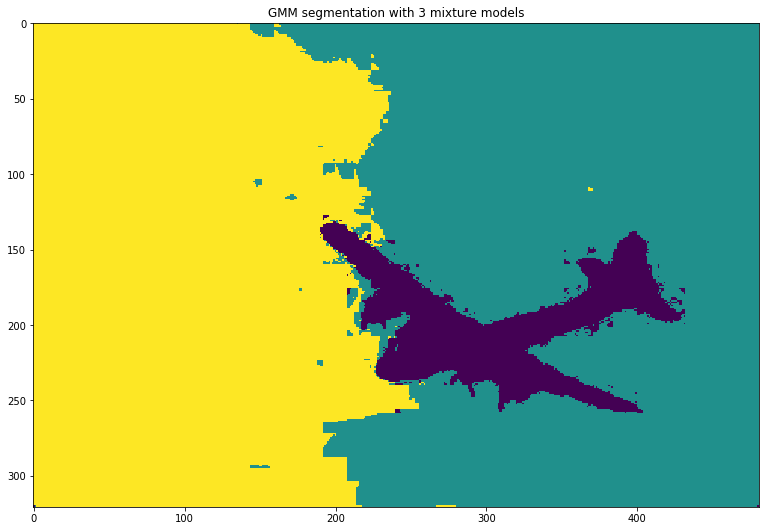

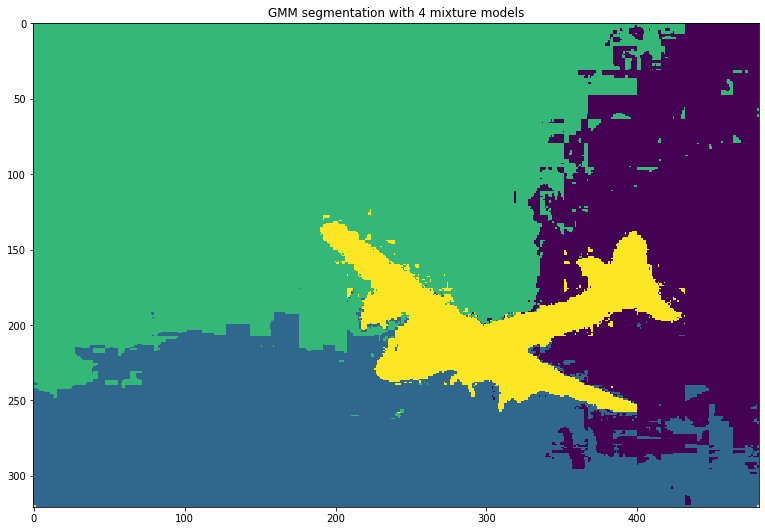

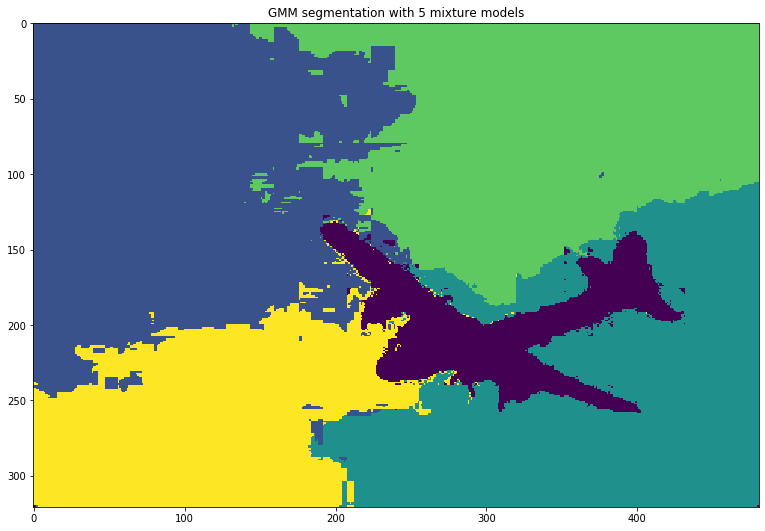

In [4]:
solve(['EECE5644_2019Fall_Homework4Questions_42049_colorBird.jpg','EECE5644_2019Fall_Homework4Questions_3096_colorPlane.jpg'])

<img style="transform:  width:1200px" src="IMG_6421.JPG" alt="sieve shaker" title="Title text" />


Apply GMM and K means on above feature vector

K means
<img style="transform: width:1200px" src="1.png" alt="sieve shaker" title="Title text" />


GMM

<img style="transform: width:1200px" src="2.png" alt="sieve shaker" title="Title text" />

<img style="transform: width:1200px" src="4.png" alt="sieve shaker" title="Title text" />

<img style="transform: width:1200px" src="5.png" alt="sieve shaker" title="Title text" />


Observations from Segmentation :

GMM does a soft assignment. Each pixel is expressed as a weighted sum of gaussians. We don't see proper boundaries for bird or plane. 

K Means does hard assignment. It only detects spherical cluster. 
Kmeans calculate distance, while GM calculates “weighted” distance. 

Further, since we added X and Y coordinates as features, we see more contiguous blocks of classification (than disconnected components)

## Answer 2

In [18]:
def sample_class2():
    '''
    function to general samples from class 2
    '''
    rad=np.random.uniform(2,3)
    theta=np.random.uniform(-np.pi,np.pi)
    return np.matrix([rad*np.cos(theta),rad*np.sin(theta)])

In [19]:
def plot_SVM_gaussian():
    '''
    Helper function
    '''
    from matplotlib.pyplot import figure
    fig = plt.figure(figsize=(15,10));
    plt.xlabel('Variable x1',size=13)
    plt.ylabel('Variable x2',size=13)
    fig.suptitle('Logistic Regression decision boundary for data from 2 Gaussians', fontsize=15)
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1] # True Positive for class 0 and class 1 respectively
    # tp0 is boolean with "tp and class=0"
    X0, X1 = X[y == 0], X[y == 1] # points 
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    
    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='x', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x', s=20, color='#990000')  # dark red
    
    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='white')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='*', s=20, color='#000099')  # dark blue
    plt.scatter(4,4,color='blue')
    plt.scatter(-4,-4,color='blue')
    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z=model.predict_proba((np.c_[xx.ravel(), yy.ravel()]))[:,1]
    Z=Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap='plasma',norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black');
    plt.subplots_adjust(top=.95);


In [41]:
def plot_SVM_linear():
    '''
    Helper function
    '''
    from matplotlib.pyplot import figure
    fig = plt.figure(figsize=(15,10));
    plt.xlabel('Variable x1',size=13)
    plt.ylabel('Variable x2',size=13)
    fig.suptitle('Logistic Regression decision boundary for data from 2 Gaussians', fontsize=15)
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1] # True Positive for class 0 and class 1 respectively
    # tp0 is boolean with "tp and class=0"
    X0, X1 = X[y == 0], X[y == 1] # points 
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    
    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='x', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x', s=20, color='#990000')  # dark red
    
    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='white')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='*', s=20, color='#000099')  # dark blue
    plt.scatter(4,4,color='blue')
    plt.scatter(-4,-4,color='blue')
    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z=model.predict_proba((np.c_[xx.ravel(), yy.ravel()]))[:,1]
    Z=Z.reshape(xx.shape)
    
    plt.pcolormesh(xx, yy, Z, cmap='plasma',norm=colors.Normalize(0., 1.), zorder=0)
    #plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black');
    plt.subplots_adjust(top=.95);


In [20]:
def plot_data():
    '''
    Helper function
    '''
    fig = plt.figure(figsize=(13,13));
    prior=0.35
    zero_mean=[0,0]
    cov=[[1,0],[0,1]]
    samples_class1=[]
    samples_class2=[]
    for num in range(1000):    
        uniform_sample=np.random.uniform()
        if uniform_sample<prior:
            sample=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()
            samples_class1.append(sample)
        else:
            sample=sample_class2().T
            samples_class2.append(sample)
    samples_class1=np.hstack(samples_class1) # samples from class 1
    samples_class2=np.hstack(samples_class2) # samples from class 2

    # shape data to nice format
    a=np.squeeze(np.asarray(samples_class1.transpose()[:,1]))
    b=np.squeeze(np.asarray(samples_class1.transpose()[:,0]))

    c=np.squeeze(np.asarray(samples_class2.transpose()[:,1])) 
    d=np.squeeze(np.asarray(samples_class2.transpose()[:,0]))

    # plot data
    plt.scatter(b,a,color='r',marker='*',label='class 1',s=50)
    plt.scatter(d,c,color='b',marker='*',label='class 1',s=50)
    plt.title('Distribution of 2 classes')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    return samples_class1,samples_class2

In [22]:
def plot_data_test():
    '''
    Helper function
    '''
    fig = plt.figure(figsize=(13,13));
    prior=0.35
    zero_mean=[0,0]
    cov=[[1,0],[0,1]]
    samples_class1=[]
    samples_class2=[]
    for num in range(1000):    
        uniform_sample=np.random.uniform()
        if uniform_sample<prior:
            sample=np.random.multivariate_normal(zero_mean,cov,[1]).transpose()
            samples_class1.append(sample)
        else:
            sample=sample_class2().T
            samples_class2.append(sample)
    samples_class1=np.hstack(samples_class1) # samples from class 1
    samples_class2=np.hstack(samples_class2) # samples from class 2

    # shape data to nice format
    a=np.squeeze(np.asarray(samples_class1.transpose()[:,1]))
    b=np.squeeze(np.asarray(samples_class1.transpose()[:,0]))

    c=np.squeeze(np.asarray(samples_class2.transpose()[:,1])) 
    d=np.squeeze(np.asarray(samples_class2.transpose()[:,0]))

    # plot data
    plt.scatter(b,a,color='r',marker='*',label='class 1',s=50)
    plt.scatter(d,c,color='b',marker='*',label='class 1',s=50)
    plt.title('Distribution of 2 classes. Test dataset')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    return samples_class1,samples_class2

In [23]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

Accuracy is : 94.1  %


Optimal model paramaters are :
C  10.0
Gamma 0.31622776601683794


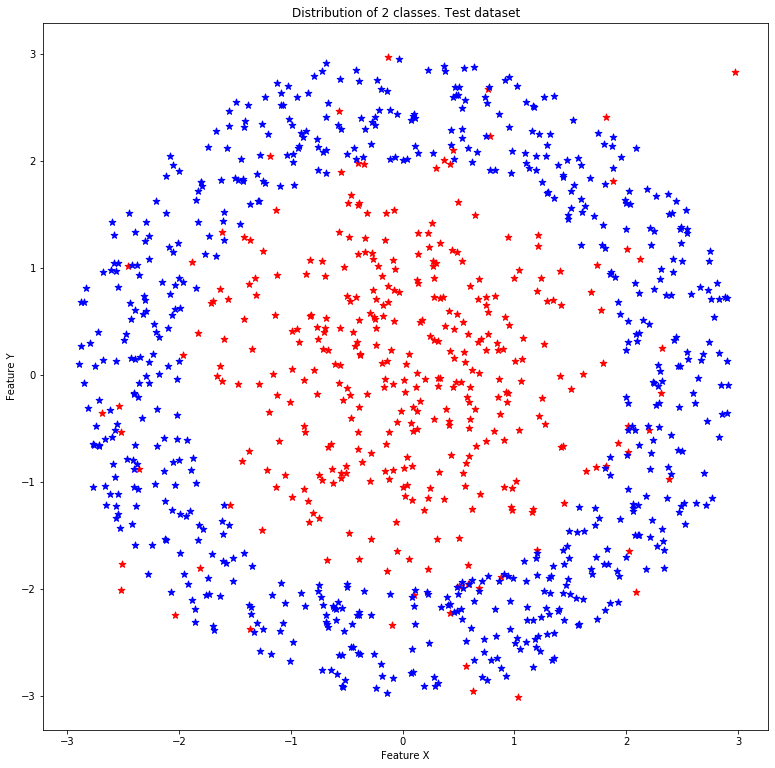

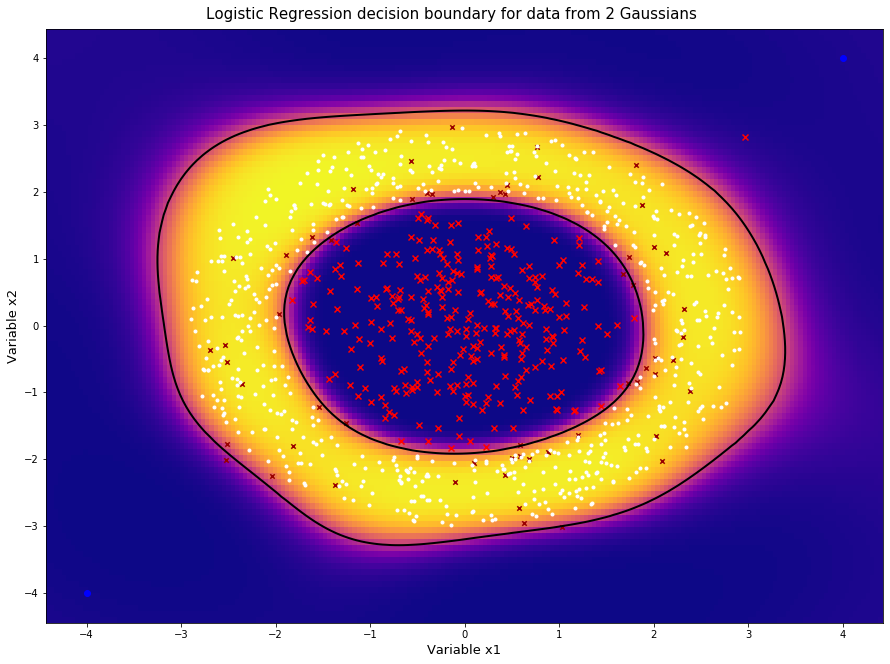

In [37]:
samples_class1,samples_class2=plot_data()
'''
Transform X and Y to desired shapes
'''
X=np.hstack([samples_class1,samples_class2])
X=X.T
X=np.squeeze(np.asarray(X))
y = np.hstack((np.zeros(samples_class1.shape[1]), np.ones(samples_class2.shape[1])))
svc = svm.SVC(probability=True)
parameters = {'C':np.logspace(1, 0, 5, endpoint=True).tolist(),'gamma':np.logspace(-0.5, -0.8, 5, endpoint=True).tolist()}
model = GridSearchCV(svc, parameters, cv=10)
model.fit(X, y)
y_pred=model.predict(X)
print ("Accuracy is :", np.sum(y_pred==y)/10.0," %\n\n")
print ("Optimal model paramaters are :\nC ", model.best_estimator_.C)
print ("Gamma", model.best_estimator_.gamma)
plot_SVM_gaussian()
GridSearch_table_plot(model, "C", negative=False)
GridSearch_table_plot(model, "gamma", negative=False)

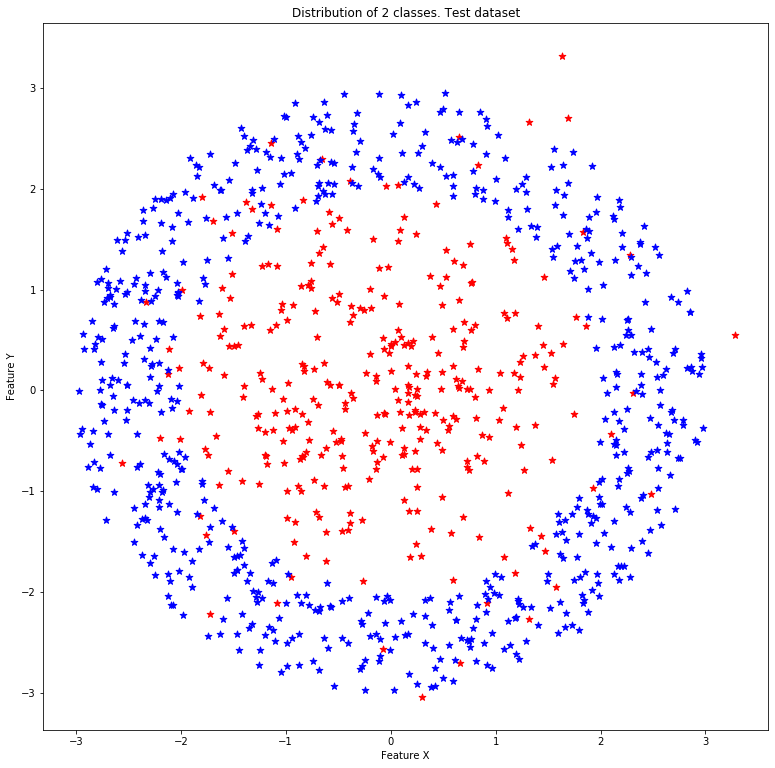

Accuracy on 1000 new test samples is  93.7 %


In [38]:
# Use the best gamma and C for testing on new test data
svc = svm.SVC(probability=True,gamma=model.best_estimator_.gamma,C=model.best_estimator_.C)
# Train on entire dataset X and y
svc.fit(X, y)

# generate test data
samples_class1_test,samples_class2_test=plot_data_test()

'''
Transform X and Y to desired shapes
'''
X_test=np.hstack([samples_class1_test,samples_class2_test])
X_test=X_test.T
X_test=np.squeeze(np.asarray(X_test))
y_test = np.hstack((np.zeros(samples_class1_test.shape[1]), np.ones(samples_class2_test.shape[1])))

# test model on test data
y_test_pred=model.predict(X_test)
plt.show()
print ("Accuracy on 1000 new test samples is ",(np.sum(y_test_pred==y_test))/10.0,"%")

### Linear SVM

Accuracy is : 62.8  %


Optimal model paramaters are :
C  10.0
best parameters: {'C': 10.0}
best score:      0.62800 (+/-0.00257)
{'C': 10.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.066607,0.002720,0.000611,0.000046,10,{'C': 10.0},0.623762,0.623762,0.63,0.63,0.63,0.63,0.63,0.63,0.626263,0.626263,0.628,0.002574,1
1,0.051809,0.003635,0.000652,0.000148,5.62341,{'C': 5.623413251903491},0.623762,0.623762,0.63,0.63,0.63,0.63,0.63,0.63,0.626263,0.626263,0.628,0.002574,1
2,0.038867,0.000813,0.000560,0.000047,3.16228,{'C': 3.1622776601683795},0.623762,0.623762,0.63,0.63,0.63,0.63,0.63,0.63,0.626263,0.626263,0.628,0.002574,1
3,0.030699,0.000166,0.000537,0.000013,1.77828,{'C': 1.7782794100389228},0.623762,0.623762,0.63,0.63,0.63,0.63,0.63,0.63,0.626263,0.626263,0.628,0.002574,1
4,0.025473,0.000146,0.000551,0.000072,1,{'C': 1.0},0.623762,0.623762,0.63,0.63,0.63,0.63,0.63,0.63,0.626263,0.626263,0.628,0.002574,1


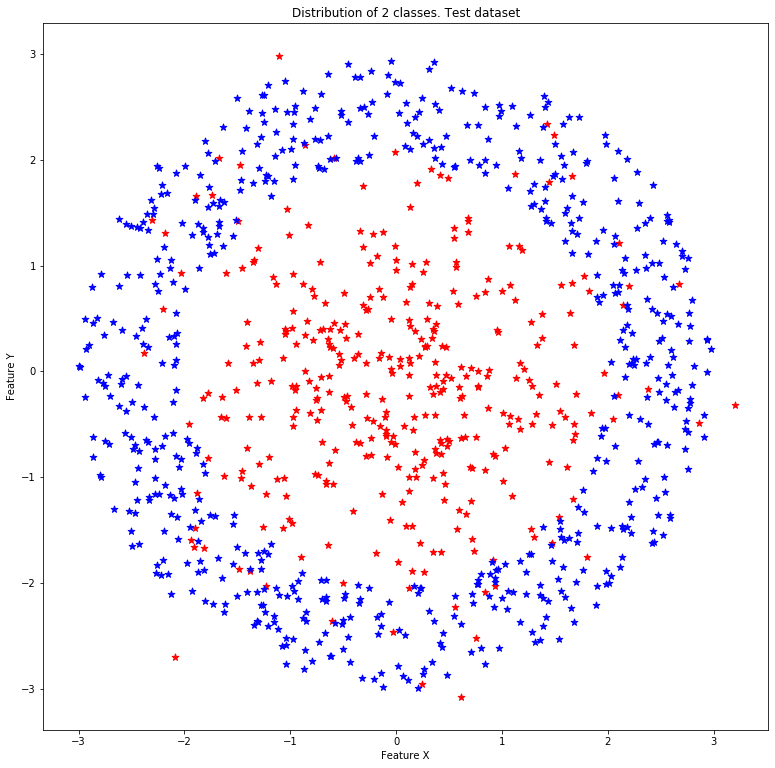

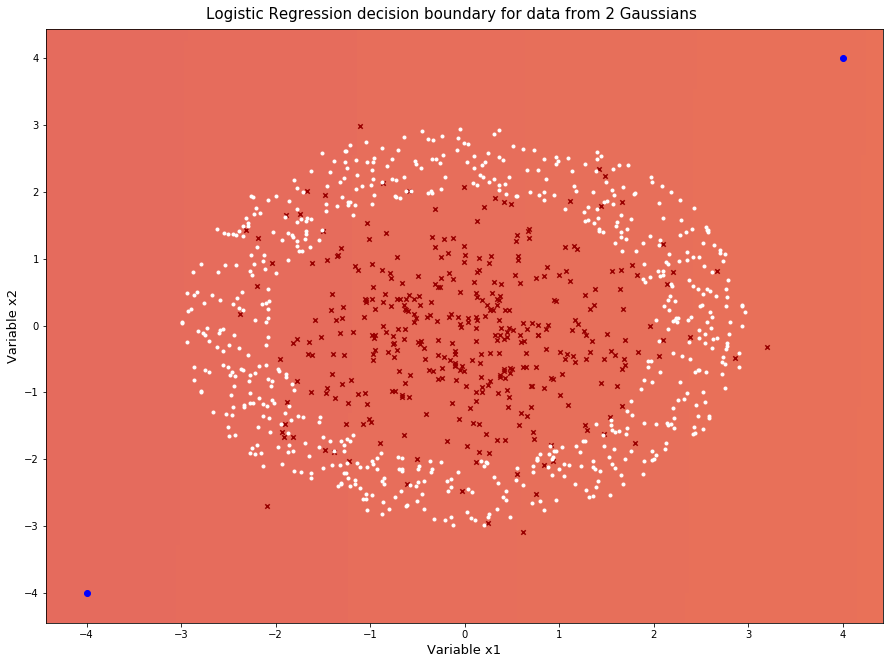

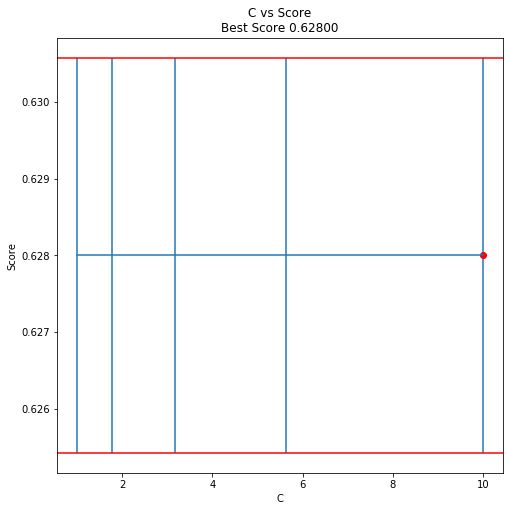

In [46]:
samples_class1,samples_class2=plot_data()
'''
Transform X and Y to desired shapes
'''
X=np.hstack([samples_class1,samples_class2])
X=X.T
X=np.squeeze(np.asarray(X))
y = np.hstack((np.zeros(samples_class1.shape[1]), np.ones(samples_class2.shape[1])))
svc = svm.SVC(probability=True,kernel='linear')
parameters = {'C':np.logspace(1, 0, 5, endpoint=True).tolist()}
model = GridSearchCV(svc, parameters, cv=10)
model.fit(X, y)
y_pred=model.predict(X)
print ("Accuracy is :", np.sum(y_pred==y)/10.0," %\n\n")
print ("Optimal model paramaters are :\nC ", model.best_estimator_.C)
plot_SVM_linear()
GridSearch_table_plot(model, "C", negative=False)

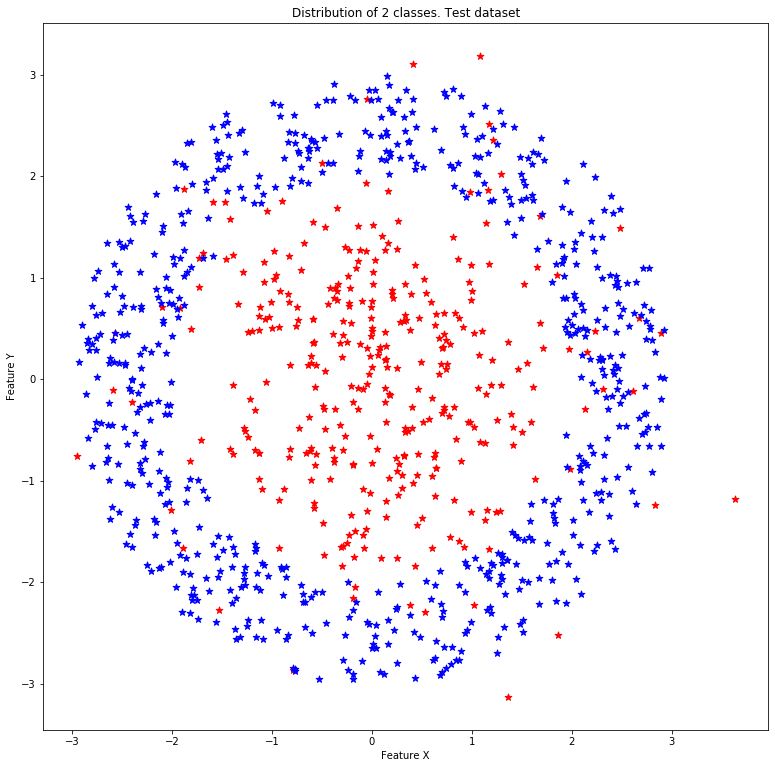

Accuracy on 1000 new test samples is  65.7 %


In [47]:
# Use the best gamma and C for testing on new test data
svc = svm.SVC(probability=True,gamma=model.best_estimator_.C,kernel='linear')
# Train on entire dataset X and y
svc.fit(X, y)

# generate test data
samples_class1_test,samples_class2_test=plot_data_test()

'''
Transform X and Y to desired shapes
'''
X_test=np.hstack([samples_class1_test,samples_class2_test])
X_test=X_test.T
X_test=np.squeeze(np.asarray(X_test))
y_test = np.hstack((np.zeros(samples_class1_test.shape[1]), np.ones(samples_class2_test.shape[1])))

# test model on test data
y_test_pred=model.predict(X_test)
plt.show()
print ("Accuracy on 1000 new test samples is ",(np.sum(y_test_pred==y_test))/10.0,"%")

### Explanation

* Our data is non linear 
* Linear SVM performs very poorly with non linear data. It predicts all labels are 1, and accuracy is close to prior of dominant class (close to 0.65 here). Even though we do cross validation, still accuracy is around 64%
* Gaussian SVM performs very well on non linear data. Using RBF kernel (kernel trick), we transform the data to higher dimension and make it linearly separable. Further, using k fold cross validation, and grid search to find the right C and gamma parameters; we optimze for C and gamma the minizime the prob of error. 